### Stock Market Prediction And Forcasting Using Stacked LSTM

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Data collection 
import pandas_datareader as pdr

In [114]:
df = pdr.get_data_tiingo('AAPL', api_key='f4c63e69668ce8e0333bd84aebd85d2a18d0b49f')

C:\Users\nikhi\AppData\Local\Temp\ipykernel_4076\1618971130.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key='f4c63e69668ce8e0333bd84aebd85d2a18d0b49f')


In [115]:
df.to_csv('AAPL.csv')

In [116]:
df = pd.read_csv('AAPL.csv')

In [117]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-11-13 00:00:00+00:00,173.97,174.5000,173.40,173.50,16828025,41.355099,41.481087,41.219602,41.243373,67312100,0.0,1.0
1,AAPL,2017-11-14 00:00:00+00:00,171.34,173.4800,171.18,173.04,23588451,40.729911,41.238619,40.691877,41.134025,94353804,0.0,1.0
2,AAPL,2017-11-15 00:00:00+00:00,169.08,170.3197,168.38,169.97,28702351,40.192677,40.487372,40.026278,40.404243,114809404,0.0,1.0
3,AAPL,2017-11-16 00:00:00+00:00,171.10,171.8700,170.30,171.18,23497326,40.672860,40.855899,40.482689,40.691877,93989304,0.0,1.0
4,AAPL,2017-11-17 00:00:00+00:00,170.15,171.3900,169.64,171.04,21665811,40.447031,40.741797,40.325797,40.658597,86663244,0.0,1.0


In [118]:
# taking the close colum from the data set
df1 = df.reset_index()['close']

In [119]:
df1.head()

0    173.97
1    171.34
2    169.08
3    171.10
4    170.15
Name: close, dtype: float64

In [120]:
df1.shape

(1258,)

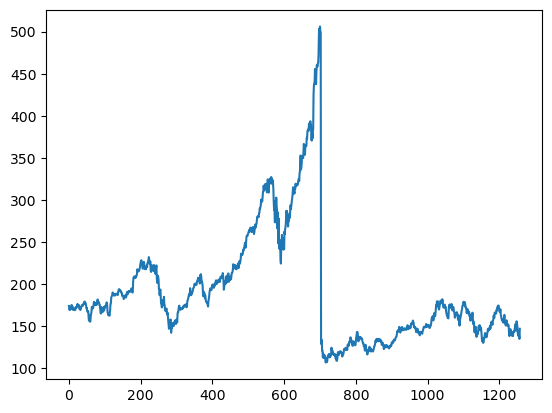

In [121]:
plt.plot(df1)

In [122]:
# LSTM perform well on scaled data

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) # scale down between 0, 1
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [124]:
df1.shape

(1258, 1)

In [125]:
df1

array([[0.16814026],
       [0.16155291],
       [0.1558923 ],
       ...,
       [0.08180338],
       [0.07020664],
       [0.10026299]])

In [126]:
# splitting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
#                           0 -> 875                875 - >
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [127]:
training_size, test_size

(817, 441)

In [128]:
# convert an array of values into dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  # i=0, 1, 2, 3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [129]:
# reshape into X=t,t+1,t+2,t+3 and t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test , y_test = create_dataset(test_data, time_step)

In [130]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [132]:
print(X_train.shape), print(y_test.shape)

(716, 100)
(340,)


(None, None)

In [133]:
# We need to convert all this data to 3D
# reshape input[samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [135]:
# crate LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [140]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [141]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 126ms/step - loss: 0.0428 - val_loss: 0.0012
Epoch 2/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0192 - val_loss: 0.0078
Epoch 3/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0124 - val_loss: 3.7863e-04
Epoch 4/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0115 - val_loss: 0.0020
Epoch 5/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0118 - val_loss: 0.0015
Epoch 6/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0087 - val_loss: 3.8492e-04
Epoch 7/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0086 - val_loss: 8.8584e-04
Epoch 8/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0068 - val_loss: 5.4192e-04
Epoch 9/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0067 - val_loss: 3.6534e-04
Epoch 10/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0

12/12 [==============================] - 0s 29ms/step - loss: 0.0022 - val_loss: 2.8692e-04
Epoch 80/100
12/12 [==============================] - 1s 49ms/step - loss: 0.0023 - val_loss: 3.0894e-04
Epoch 81/100
12/12 [==============================] - 0s 35ms/step - loss: 0.0019 - val_loss: 2.8064e-04
Epoch 82/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0014 - val_loss: 2.2636e-04
Epoch 83/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0013 - val_loss: 2.6530e-04
Epoch 84/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0014 - val_loss: 2.8496e-04
Epoch 85/100
12/12 [==============================] - 0s 34ms/step - loss: 0.0022 - val_loss: 6.5061e-04
Epoch 86/100
12/12 [==============================] - 0s 33ms/step - loss: 0.0016 - val_loss: 2.5056e-04
Epoch 87/100
12/12 [==============================] - 0s 33ms/step - loss: 0.0014 - val_loss: 2.3893e-04
Epoch 88/100
12/12 [==============================] - 0s 32ms/step -

In [143]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [145]:
# Transformback to orginal form
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [146]:
# Calculate RMSE prefomance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_pred))

211.9313571314922

In [147]:
# test data RMSE
math.sqrt(mean_squared_error(y_test, test_pred))

152.78924852563543

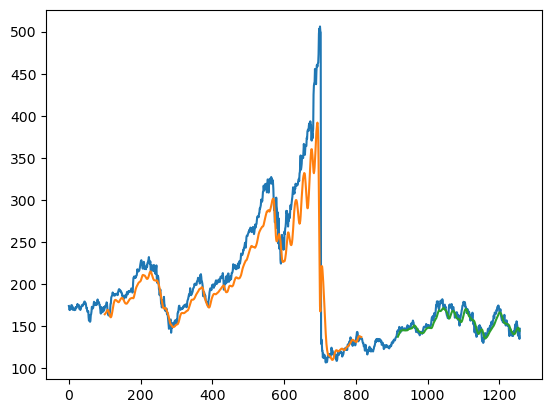

In [148]:
# plotting 
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred
# shift test predictions for ploting 
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df1)-1, :] = test_pred
# plot base line and predictions 
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [150]:
len(test_data)

441

In [151]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [152]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [153]:
temp_input

[0.07140889167188474,
 0.07872260488415778,
 0.08721352536005006,
 0.08721352536005006,
 0.07664370695053219,
 0.08112711333750777,
 0.07484032561051968,
 0.08037570444583592,
 0.08696305572949276,
 0.09036944270507191,
 0.09896055103318718,
 0.10068879148403248,
 0.09525360050093923,
 0.0977332498434565,
 0.09680651221039449,
 0.10427050720100184,
 0.10852849092047584,
 0.1007639323731997,
 0.11060738885410137,
 0.11571696931747022,
 0.12150281778334371,
 0.1183469004383218,
 0.11549154664996863,
 0.11211020663744514,
 0.12510958046336873,
 0.12651221039448962,
 0.139436443331246,
 0.13693174702567307,
 0.13317470256731367,
 0.1485034439574201,
 0.1477019411396368,
 0.14654978083907322,
 0.1453475266123982,
 0.14547276142767684,
 0.15629304946775202,
 0.1544145272385723,
 0.16345648090169063,
 0.16618659987476514,
 0.16578584846587346,
 0.1695929868503444,
 0.1685911083281152,
 0.16200375704445835,
 0.15211020663744512,
 0.15125860989355033,
 0.15201001878522225,
 0.15827175954915462,

In [154]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.08796136]
101
1 day input [0.0787226  0.08721353 0.08721353 0.07664371 0.08112711 0.07484033
 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879 0.0952536
 0.09773325 0.09680651 0.10427051 0.10852849 0.10076393 0.11060739
 0.11571697 0.12150282 0.1183469  0.11549155 0.11211021 0.12510958
 0.12651221 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194
 0.14654978 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648
 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376 0.15211021
 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954
 0.1261866  0.12804008 0.12265498 0.11944897 0.12303068 0.11927364
 0.1265623  0.14174076 0.11772073 0.12140263 0.11403882 0.10985598
 0.11932373 0.1253851  0.11742016 0.11496556 0.10917971 0.11003131
 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224 0.09833438
 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094 0.07889793
 0.09054477 0.07899812 0.08909205 0.09244834 0.09272386 0.09154665
 0.10126487 0.10672511 0.11396368 

10 day output [[0.08252466]]
11 day input [0.10068879 0.0952536  0.09773325 0.09680651 0.10427051 0.10852849
 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469  0.11549155
 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175 0.1331747
 0.14850344 0.14770194 0.14654978 0.14534753 0.14547276 0.15629305
 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111
 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176 0.14221666
 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897
 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263
 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556
 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728
 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077
 0.08050094 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834
 0.09272386 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464
 0.09507827 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047
 0.07899812 0.08035066

19 day output [[0.08360377]]
20 day input [0.12150282 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221
 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978
 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866
 0.16578585 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861
 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866
 0.12804008 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623
 0.14174076 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373
 0.1253851  0.11742016 0.11496556 0.10917971 0.11003131 0.11251096
 0.10770194 0.08926738 0.07854728 0.08919224 0.09833438 0.09908579
 0.09665623 0.08328115 0.0841077  0.08050094 0.07889793 0.09054477
 0.07899812 0.08909205 0.09244834 0.09272386 0.09154665 0.10126487
 0.10672511 0.11396368 0.10647464 0.09507827 0.12247965 0.11646838
 0.10973075 0.09565435 0.08025047 0.07899812 0.08035066 0.08180338
 0.07020664 0.10026299 0.08796136 0.08604603 0.08472179 0.08380347
 0.08316907 0.08274444 

27 day output [[0.08284125]]
28 day input [0.1331747  0.14850344 0.14770194 0.14654978 0.14534753 0.14547276
 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299
 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176
 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498
 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073
 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016
 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738
 0.07854728 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115
 0.0841077  0.08050094 0.07889793 0.09054477 0.07899812 0.08909205
 0.09244834 0.09272386 0.09154665 0.10126487 0.10672511 0.11396368
 0.10647464 0.09507827 0.12247965 0.11646838 0.10973075 0.09565435
 0.08025047 0.07899812 0.08035066 0.08180338 0.07020664 0.10026299
 0.08796136 0.08604603 0.08472179 0.08380347 0.08316907 0.08274444
 0.08248416 0.08235693 0.0823371  0.08240074 0.08252466 0.08268683
 0.0828672  0.083048

In [155]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [156]:
import matplotlib.pyplot as plt

In [157]:
len(df1)

1258

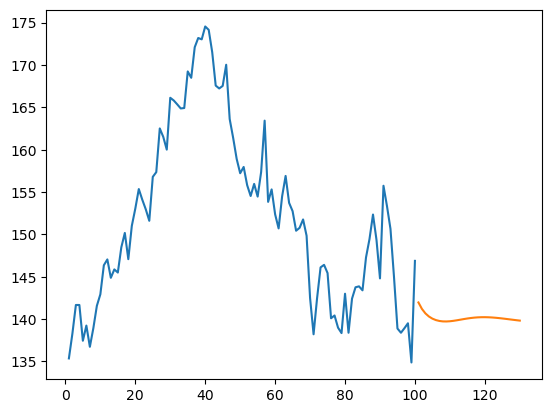

In [158]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

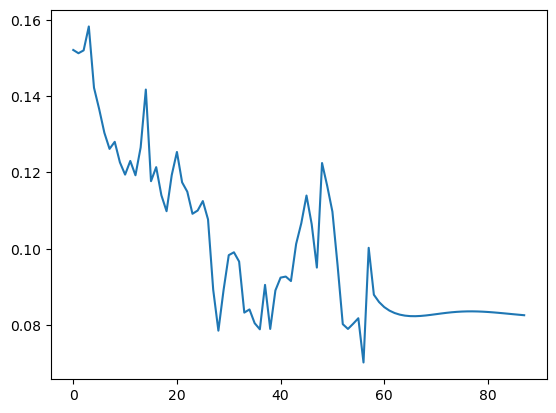

In [159]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

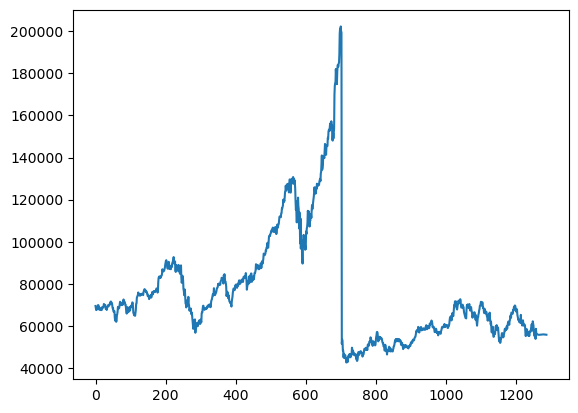

In [161]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)